In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Load the training data
df = pd.read_csv('train.csv')
print(f"Dataset shape: {df.shape}")
print(f"\ncolumns in dataset: {len(df.columns)}")
df.head()

Dataset shape: (1460, 81)

columns in dataset: 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Fill missing values for bathroom counts with 0
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['FullBath'] = df['FullBath'].fillna(0)
df['HalfBath'] = df['HalfBath'].fillna(0)


In [ ]:
# Create total bathrooms feature (counting half baths as 0.5)
df['Totalbath']=(df['BsmtFullBath']+df['FullBath']+(df['BsmtHalfBath']+df['HalfBath'])*0.5)
# Create our feature set
X = df[['GrLivArea', 'BedroomAbvGr', 'Totalbath']]
y = df['SalePrice']
print(X.shape,y.shape)


(1460, 3) (1460,)


In [ ]:
#spliting and training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Make predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
# Calculate metrics
r2 = r2_score(y_test,y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R²score: ',r2)
print('RMSE: ',rmse)

R²score:  0.6579346254018674
RMSE:  51222.58298203379


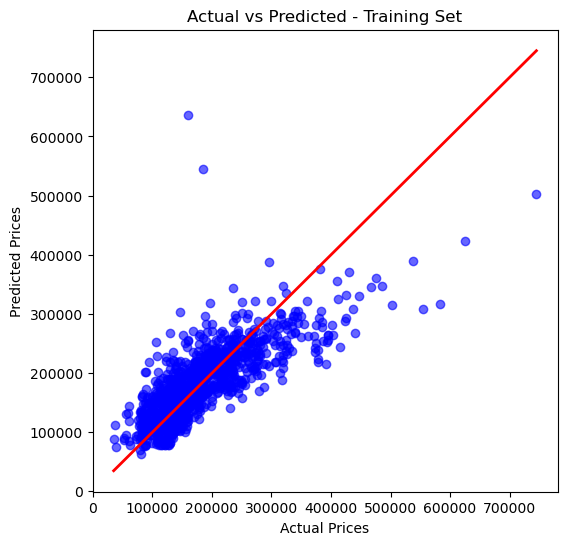

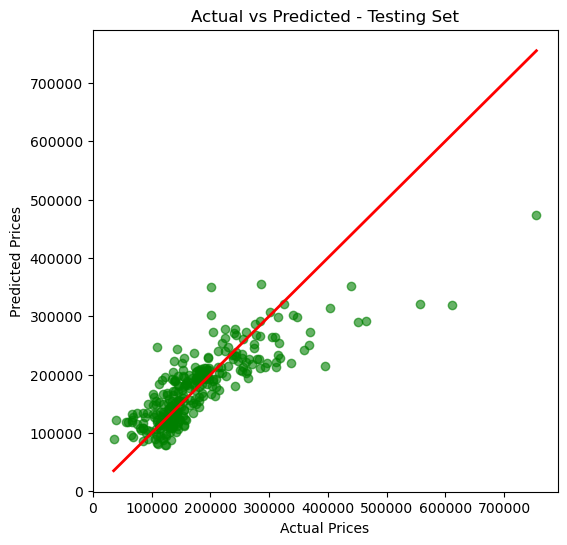

In [ ]:
# Visualize predictions vs actual values
# Training set
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_train_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted - Training Set")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="red", linewidth=2)  # 45-degree line
plt.show()

# Testing set
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color="green")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted - Testing Set")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.show()

## HousePrice predictioin for test data

In [ ]:
#Prepare the same features in test set
test_df = pd.read_csv('test.csv')
test_df['Totalbath'] = (
    test_df['BsmtFullBath'] + test_df['FullBath'] + 
    (test_df['BsmtHalfBath'] + test_df['HalfBath']) * 0.5
)

X_test_final = test_df[['GrLivArea', 'BedroomAbvGr', 'Totalbath']]

In [ ]:
#checking nulls
print(X_test_final.isnull().sum())

GrLivArea       0
BedroomAbvGr    0
Totalbath       2
dtype: int64


In [ ]:
#Handling nulls
X_test_final['Totalbath'].fillna(X['Totalbath'].median(), inplace=True)
print(X_test_final.isnull().sum())

GrLivArea       0
BedroomAbvGr    0
Totalbath       0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_25220\2771401859.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test_final['Totalbath'].fillna(X['Totalbath'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_25220\2771401859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_final['Totalbath'].fillna(X['Totalbath'].media

In [ ]:
#Predict SalePrice
test_predictions = regressor.predict(X_test_final)

In [ ]:
#save prediction for submission
output = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_predictions
})

output.to_csv("submission.csv", index=False)

In [249]:
# Example predictions for different house configurations
example_houses = pd.DataFrame({
    'GrLivArea': [1500, 2000, 2500, 3000],
    'BedroomAbvGr': [3, 3, 4, 4],
    'Totalbath': [2.0, 2.5, 3.0, 3.5]
})

print("Example House Configurations:")
print(example_houses)
# Make predictions
example_predictions = regressor.predict(example_houses)

# Display results
results_df = example_houses.copy()
results_df['Predicted_Price'] = example_predictions

print("\nPredicted Prices:")
print("=" * 70)
for i, row in results_df.iterrows():
    print(f"House {i+1}: {row['GrLivArea']:,} sq ft, {row['BedroomAbvGr']} bedrooms, {row['Totalbath']} bathrooms")
    print(f"         Predicted Price: ${row['Predicted_Price']:,.0f}")
    print()

Example House Configurations:
   GrLivArea  BedroomAbvGr  Totalbath
0       1500             3        2.0
1       2000             3        2.5
2       2500             4        3.0
3       3000             4        3.5

Predicted Prices:
House 1: 1,500.0 sq ft, 3.0 bedrooms, 2.0 bathrooms
         Predicted Price: $169,595

House 2: 2,000.0 sq ft, 3.0 bedrooms, 2.5 bathrooms
         Predicted Price: $232,017

House 3: 2,500.0 sq ft, 4.0 bedrooms, 3.0 bathrooms
         Predicted Price: $271,193

House 4: 3,000.0 sq ft, 4.0 bedrooms, 3.5 bathrooms
         Predicted Price: $333,614

